<a href="https://colab.research.google.com/github/dogterbox/datafun/blob/master/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import sys
print(sys.version)

3.6.6 (default, Sep 12 2018, 18:26:19) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


In [10]:
import pandas as pd
df = pd.read_csv('sample_data/california_housing_test.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
longitude             3000 non-null float64
latitude              3000 non-null float64
housing_median_age    3000 non-null float64
total_rooms           3000 non-null float64
total_bedrooms        3000 non-null float64
population            3000 non-null float64
households            3000 non-null float64
median_income         3000 non-null float64
median_house_value    3000 non-null float64
dtypes: float64(9)
memory usage: 211.0 KB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


# Read data

In [0]:
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()
iris  # show

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [0]:
x = iris['data']
y = iris['target']

# Data spliting
train 70%  
test 30%

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

# Create Model

## SVM

In [0]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(x_train, y_train);

# Evaluate Model

## Prediction

In [53]:
y_pred = model.predict(x_test)
print(y_pred)

[0 1 1 0 0 0 0 2 1 1 0 0 2 0 2 2 1 2 2 1 2 1 0 0 0 0 0 2 0 1 1 2 2 0 2 0 0
 2 0 0 1 0 2 2 1]


## Confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [0]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[20  0  0]
 [ 0 11  0]
 [ 0  0 14]]


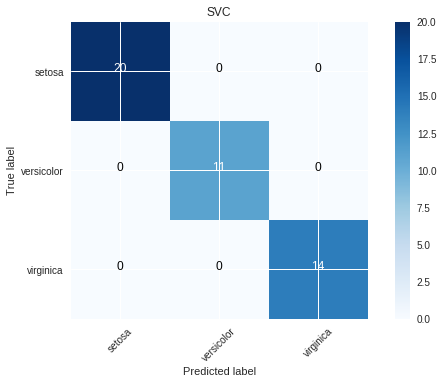

In [51]:
#plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=iris.target_names,
                      title='SVC')
plt.show()

## Accuracy score

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred) * 100)

100.0


## F-measure

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      1.00      1.00        11
          2       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        45



# Save model

In [40]:
from sklearn.externals import joblib

filename = 'svc.model'
joblib.dump(model, filename)

# joblib.load(filename)  # load model

['svc.model']